<a href="https://colab.research.google.com/github/C-HARRIETH/Dog-Breed-Image-Classification/blob/main/SuperBrains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOG BREED IMAGE CLASSIFICATION**

## 1. Defining the Question

### a) Specifying the Question

We have been tasked by an upcoming dog shelter to build a model that classifies different dog breeds from given images.

### b) Defining the Metric for Success

The project will be considered successful when we create a model with an accuracy score of 80%.

### c) Understanding the context 

This project is important to dog shelters because, it will help the workers classify the dogs correctly for better care since different breeds of dogs require different care.

### d) Recording the Experimental Design

The following are the steps taken in the analysis.

1. Acquiring relevant data
2. Exploring the data
3. Data pre-processing
4. Training the model
5. Evaluating the model

### e) Data Relevance

The relevant data contains images of different breeds of dogs.

The data relevance will be measured against the matrix of success.

## 2. Loading libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.ndimage as spi
import tensorflow as tf

plt.rcParams['figure.figsize'] = [16, 16]

In [ ]:
from fastai.vision import *
from fastai.metrics import accuracy, error_rate

In [ ]:
import tensorflow.keras.layers as L

from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception

from sklearn.metrics import confusion_matrix, f1_score

## 3. Loading the Data

In [ ]:
# Empty list that contains dog breeds. 
dog_breeds = ["chihuahua", "rottweiler", "germanshepherd", "pitbull", "mongrel", "labrador", "doberman", "pomeranian", "ridgeback", "basenji"]

# Folder that stores the data and path to the folders.
path = Path('data/Inputdata')

# Empty list that saves the images.
folder = []

for i in dog_breeds:
  # Assign path to the dog breeds in the list
  dest = path/i
  # Directories to store the images
  dest.mkdir(parents=True, exist_ok=True)
  # Add to the empty list
  folder.append(dest)

In [ ]:
# Creating an empty list that stores the csv files
csv = []
for j in dog_breeds:
  files = j + '.csv'
  csv.append(files)

In [ ]:
# Checking path to the folders.
folder

[PosixPath('data/Inputdata/chihuahua'),
 PosixPath('data/Inputdata/rottweiler'),
 PosixPath('data/Inputdata/germanshepherd'),
 PosixPath('data/Inputdata/pitbull'),
 PosixPath('data/Inputdata/mongrel'),
 PosixPath('data/Inputdata/labrador'),
 PosixPath('data/Inputdata/doberman'),
 PosixPath('data/Inputdata/pomeranian'),
 PosixPath('data/Inputdata/ridgeback'),
 PosixPath('data/Inputdata/basenji')]

In [ ]:
# Preview of one of dog breed csv files(basenji)
df = pd.read_csv("basenji.csv")
df.head()

,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSvsQwYkw8JlriH6s0_nZrfoYeoYVlwoGTxQ&usqp=CAU
0,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [ ]:
# Download the images and store them in folders created
m = 0   # Initialize variable

# Looping through the csvs to download 400 images using the download_images function
# for each dog breed.
while m < len(csv):
  download_images(csv[m], folder[m], max_pics=400)
  m += 1

## 4. Exploratory Data Analysis

In [ ]:
# Using the verify_images function to confirm the absence of corrupt images for the classes.
for c in dog_breeds:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

chihuahua


rottweiler


germanshepherd


pitbull


mongrel


labrador


doberman


pomeranian


ridgeback


basenji


In [ ]:
# Creating a function that loads the dog breed csv files and outputs their shapes
def load_data(name, printname, filename):
  name= pd.read_csv(filename)
  print('The shape of '+printname+' is', name.shape)

print(load_data(df, 'basenji', 'basenji.csv'))
print(load_data(df, 'chihuahua', 'chihuahua.csv'))
print(load_data(df, 'doberman', 'doberman.csv'))
print(load_data(df, 'germanshepherd', 'germanshepherd.csv'))
print(load_data(df, 'labrador', 'labrador.csv'))
print(load_data(df, 'mongrel', 'mongrel.csv'))
print(load_data(df, 'pitbull', 'pitbull.csv'))
print(load_data(df, 'pomeranian', 'pomeranian.csv'))
print(load_data(df, 'ridgeback', 'ridgeback.csv'))
print(load_data(df, 'rottweiler', 'rottweiler.csv'))

The shape of basenji is (456, 1)
None
The shape of chihuahua is (558, 1)
None
The shape of doberman is (468, 1)
None
The shape of germanshepherd is (561, 1)
None
The shape of labrador is (579, 1)
None
The shape of mongrel is (539, 1)
None
The shape of pitbull is (559, 1)
None
The shape of pomeranian is (526, 1)
None
The shape of ridgeback is (507, 1)
None
The shape of rottweiler is (502, 1)
None


## 5. Implementing the Solution with TensorFlow and Keras

In [ ]:
# installing splitfolders
!pip install split_folders

In [ ]:
import splitfolders

In [ ]:
# Path to the folders
input_folder = "/content/data/Inputdata"
output = "/content/data/Processeddata"

# Splitting the data into train, test and validation sets.
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6, .2, .2))

Copying files: 4000 files [00:00, 5697.35 files/s]


In [ ]:
# Ratios information 
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [ ]:
# Specifying height and width of ResNet50's input layer.
img_height, img_width = (224, 224) 

# Specifying train and validation set batch size.
batch_size= 32

# Defining the train, test and validation directory paths
train_data_dir = r'/content/data/Processeddata/train'
valid_data_dir = r'/content/data/Processeddata/val'
test_data_dir =  r'/content/data/Processeddata/test'

In [ ]:
# Pre-processing
# Defining our parameters for the ImageDataGenerator 
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip= True, validation_split= 0.2) 

# Specifying train features
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_height, img_width),
    batch_size= batch_size,
    class_mode= 'categorical',
    subset = 'training')

# Specifying validation features
valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_height, img_width),
    batch_size= batch_size,
    class_mode= 'categorical',
    subset = 'validation')

Found 1920 images belonging to 10 classes.
Found 160 images belonging to 10 classes.


In [ ]:
# Specifying validation features
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height, img_width),
    batch_size= 1,
    class_mode= 'categorical',
    subset = 'validation')


Found 160 images belonging to 10 classes.


In [ ]:
# Training the model
# Defining the base model by setting it to ResNet50
base_model = ResNet50(include_top=False, weights= 'imagenet')

# Taking the output of the base model
x= base_model.output

# Additional layers after the output of the ResNet50
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)

# Utilising our own classes to predict from the pre-trained ResNet50
predictions = Dense(train_generator.num_classes, activation= 'softmax')(x)

# Defining the transfer learn model taking the input from the ResNet50 and 
# output is the prediction on the final most layer.
model =  Model(inputs= base_model.input, outputs= predictions)

# Keeping the layers of our transfer learning model non-trainable.
for layer in base_model.layers:
  layer.trainable = False

# Compiling the model by passing adam as the optimizer and categorical_crossentropy as the 
# loss function and accuracy as the metric for viewing the accuracy for each training epoch.
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics= ['accuracy'])

# Fitting the model
model.fit(train_generator, epochs = 10)


94773248/94765736 [==============================] - 8s 0us/step
Epoch 1/10
60/60 [==============================] - 61s 454ms/step - loss: 2.2316 - accuracy: 0.4901
Epoch 2/10
60/60 [==============================] - 27s 455ms/step - loss: 0.4562 - accuracy: 0.8552
Epoch 3/10
60/60 [==============================] - 27s 455ms/step - loss: 0.3241 - accuracy: 0.8837
Epoch 4/10
60/60 [==============================] - 28s 456ms/step - loss: 0.2295 - accuracy: 0.9292
Epoch 5/10
60/60 [==============================] - 27s 456ms/step - loss: 0.1896 - accuracy: 0.9381
Epoch 6/10
60/60 [==============================] - 27s 455ms/step - loss: 0.1732 - accuracy: 0.9497
Epoch 7/10
60/60 [==============================] - 27s 455ms/step - loss: 0.1148 - accuracy: 0.9639
Epoch 8/10
60/60 [==============================] - 27s 455ms/step - loss: 0.1360 - accuracy: 0.9534
Epoch 9/10
60/60 [==============================] - 27s 455ms/step - loss: 0.0932 - accuracy: 0.9737
Epoch 10/10
60/60 [=======

In [ ]:
# Viewing all the layers of the network using the model's summary method.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.save('/content/data/SavedModel/ResNet50_breeds.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\n Test Accuracy: ', test_acc)

160/160 - 5s - loss: 0.5482 - accuracy: 0.8813

 Test Accuracy:  0.8812500238418579


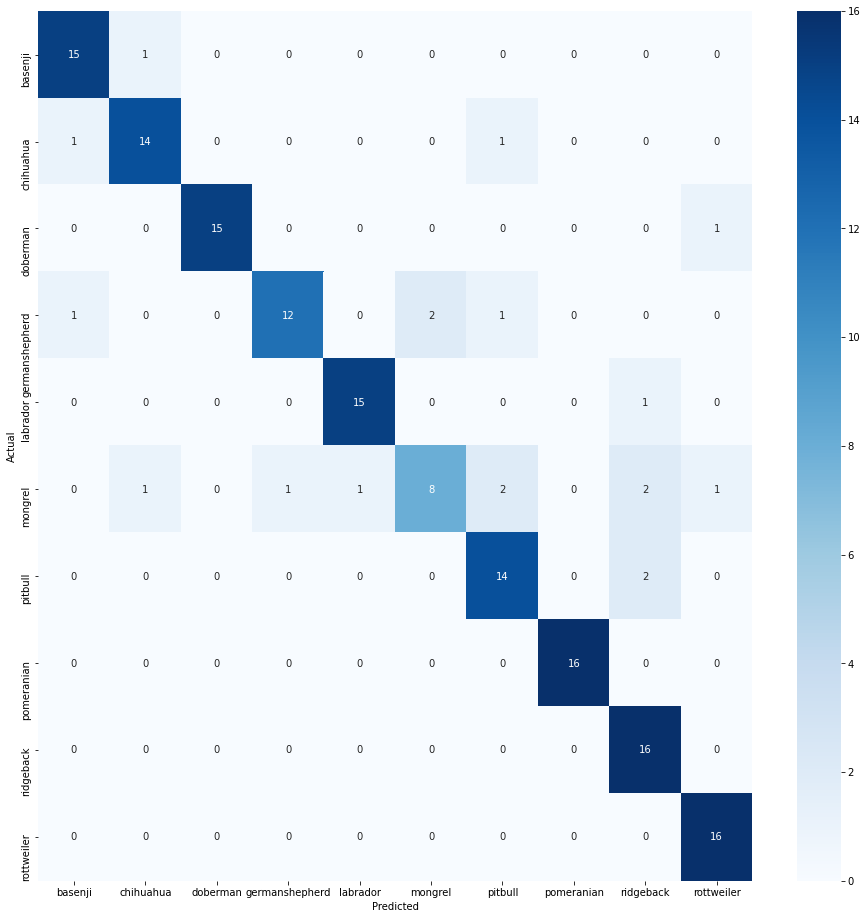

Test Accuracy; 88.125


<Figure size 1152x1152 with 0 Axes>

In [ ]:
# Confusion matrix
# Loading the saved model.
model = tf.keras.models.load_model('/content/data/SavedModel/ResNet50_breeds.h5')


# Acquiring the dog breed filenames in the test set
filenames = test_generator.filenames

# Initializing nb_samples to the number of files in test set. 
nb_samples = len(test_generator)


# Creating an empty list for predicted labels
y_prob = []

# Creating an empty list for the actual images.
y_act = []


test_generator.reset()
for _ in range (nb_samples):
  X_test, Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

# Confusion matrix
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]
out_df = pd.DataFrame(np.stack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames= ['Actual'], colnames=['Predicted'])

# Plotting the confusion matrix
sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt= 'd')
plt.show()
plt.savefig('Confusion_matrix.jpg')

# Printing the accuracy score of the model on the test set
print('Test Accuracy; {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

## 7. Challenging the solution with Fastai

In [ ]:
# Selecting a random seed
np.random.seed(42)

# Splitting the data into train and validation sets
breed = ImageDataBunch.from_folder(path, train='.', valid_pct=0.4, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [ ]:
# Viewing the classes
breed.classes

['basenji',
 'chihuahua',
 'doberman',
 'germanshepherd',
 'labrador',
 'mongrel',
 'pitbull',
 'pomeranian',
 'ridgeback',
 'rottweiler']

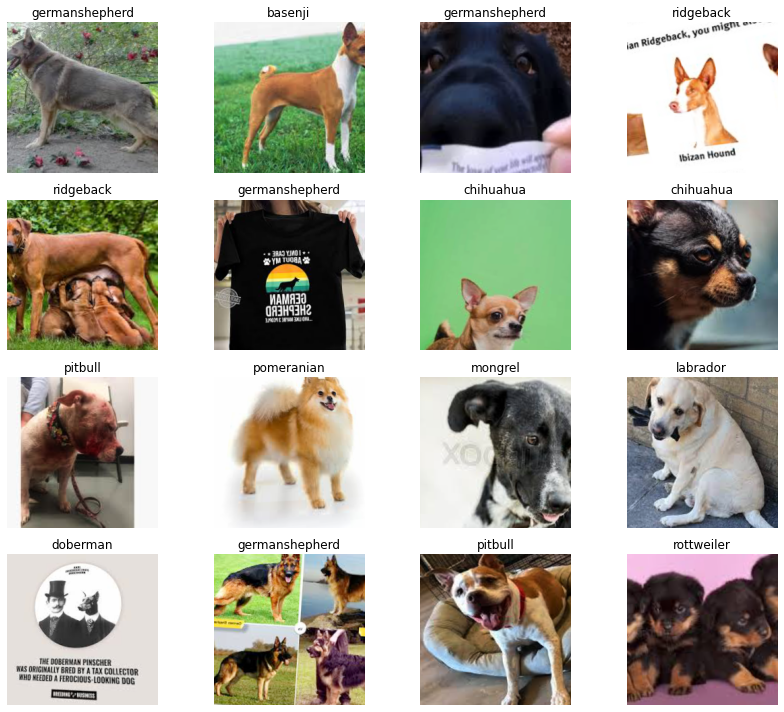

In [ ]:
# Viewing the data
breed.show_batch(4, figsize=(12,10))

In [ ]:
# Creating a model and preliminary training 
# using create_cnn to create a convolutional neural network.
learn = create_cnn(breed, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
defaults.device = torch.device('cuda')

# Fitting the model
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.744087,0.569684,0.835833,0.164167,00:43
1,1.061248,0.509427,0.850000,0.150000,00:43
2,0.772433,0.469931,0.860000,0.140000,00:42
3,0.600339,0.399754,0.871667,0.128333,00:43
4,0.485845,0.387348,0.871667,0.128333,00:43


In [ ]:
# Model Architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

## 8. Follow up questions

### a). Did we have the right data?

The images scraped were relevant to the project, but some had other unwanted objects and captions. 

### b). Do we need other data to answer our question?

No, we don't.

### c). Did we have the right question?

We had the right analysis question.